### El Clustering Jerárquico, 
es una técnica muy útil cuando se desea descubrir similitudes entre individuos en base a sus características.

““Dynamic Time Warping” o DTW 

In [1]:
indices <- read.csv(file="ahppca.csv",header=TRUE,sep=",",dec=".",row.names=1)
# los nombres de los renglones son las fechas de cada renglon de la matriz

In [2]:
head(indices)

,Karate,Fitness,Natación,Baloncesto,Fútbol,Fitness.1,Baloncesto.1,Tae.Kwon.Do,Beisbol,Pesas,Natación.1,Baloncesto.2,Atletismo,Fútbol.1,Beisbol.1,Baloncesto.3,Baloncesto.4,Fútbol.2,Beisbol.2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Velocidad,0.14,0.37629324,0.42793009,0.40245249,0.40782736,0.40314721,0.37764984,0.05912417,0.37323160,0.42445534,0.43613499,0.41499906,0.1552390,0.43384637,0.38762534,0.12401949,0.01059568,0.43612843,0.41850000
Fuerza,0.06,0.23196298,0.24790084,0.24121734,0.24127591,0.25832405,0.21704682,0.06961118,0.22680653,0.25125748,0.23745242,0.24659269,0.2651356,0.24069868,0.22564931,0.10545469,0.02041612,0.23300949,0.25483980
Potencia,0.30,0.17656429,0.13544685,0.13284924,0.14181168,0.14862630,0.17911225,0.08195827,0.15371920,0.14137882,0.13862190,0.14697833,0.1193084,0.13783184,0.14493887,0.14889525,0.03354969,0.13923632,0.14475612
Equilibrio,0.07,0.09521916,0.08269160,0.08419051,0.08819383,0.08521923,0.09597850,0.09649536,0.09395042,0.08258376,0.08202029,0.08683988,0.1841829,0.07833245,0.09625857,0.05890428,0.06034982,0.08318722,0.08177855
Coordinaci¢n,0.13,0.05405096,0.04973717,0.05655265,0.05711617,0.04886586,0.05715086,0.11361091,0.06377328,0.04621934,0.04084924,0.04959914,0.1118801,0.04858883,0.06194166,0.17175296,0.09163361,0.04970156,0.04642105
Tiempo de reacci¢n,0.18,0.03327292,0.02781666,0.03783455,0.03165427,0.02843915,0.03476066,0.13376228,0.03977308,0.02797249,0.02665718,0.02813226,0.0715609,0.03027836,0.03948937,0.19904690,0.17124777,0.03024484,0.02832279


In [4]:
# ya que las características son los renglones, se debe obtener la transpuesta de la matriz
# los renglones serán las columnas
indices_transp <- t(indices)
head(indices_transp)

,Velocidad,Fuerza,Potencia,Equilibrio,Coordinaci¢n,Tiempo de reacci¢n,Flexibilidad,Biomec nica corporal
Karate,0.1400000,0.0600000,0.3000000,0.07000000,0.13000000,0.18000000,0.04000000,0.09000000
Fitness,0.3762932,0.2319630,0.1765643,0.09521916,0.05405096,0.03327292,0.02118693,0.01144952
Natación,0.4279301,0.2479008,0.1354469,0.08269160,0.04973717,0.02781666,0.01815964,0.01031714
Baloncesto,0.4024525,0.2412173,0.1328492,0.08419051,0.05655265,0.03783455,0.02715826,0.01774496
Fútbol,0.4078274,0.2412759,0.1418117,0.08819383,0.05711617,0.03165427,0.02049700,0.01162377
Fitness.1,0.4031472,0.2583240,0.1486263,0.08521923,0.04886586,0.02843915,0.01728671,0.01009149


In [6]:
library(dtw)

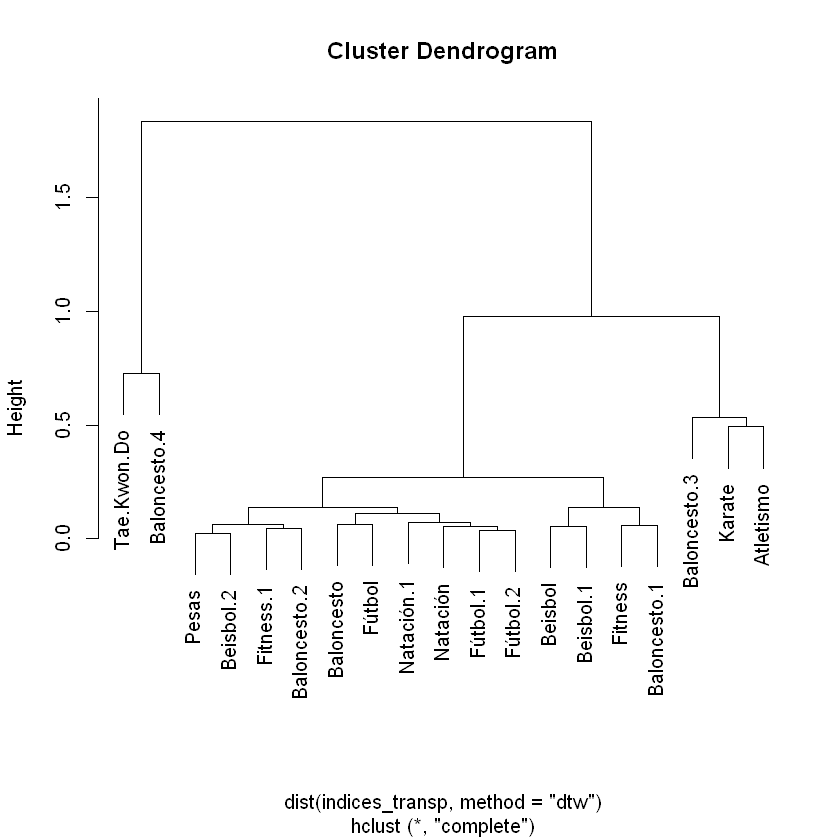

In [7]:
# crear dendograma
modelo_dtw <- hclust(dist(indices_transp, method="dtw"))
plot(modelo_dtw)

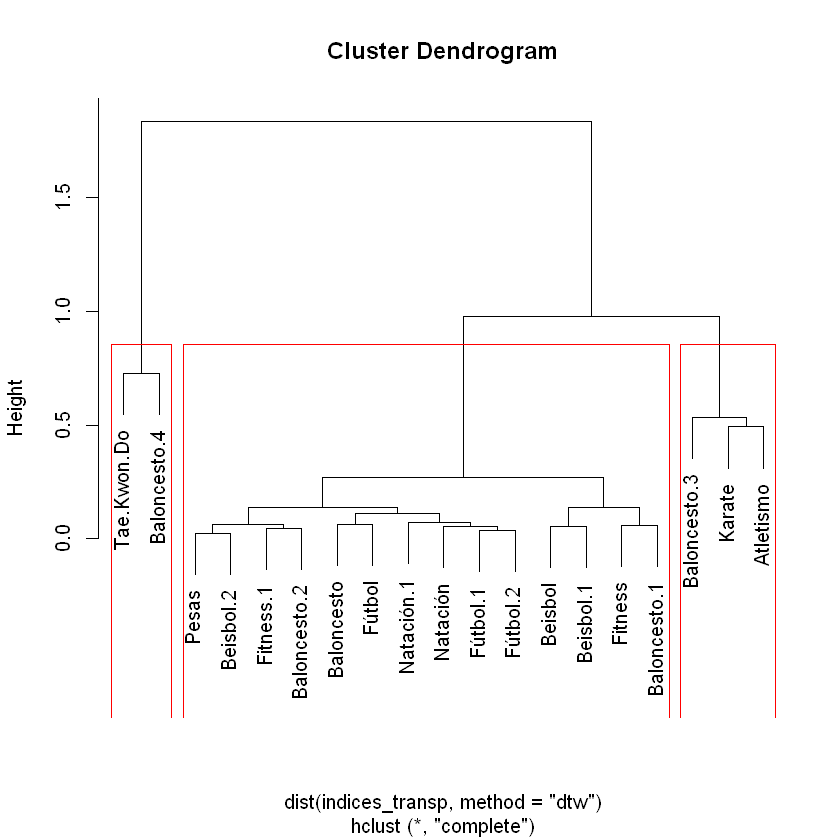

In [8]:
plot(modelo_dtw)
rect.hclust(modelo_dtw,k=3,border="red")

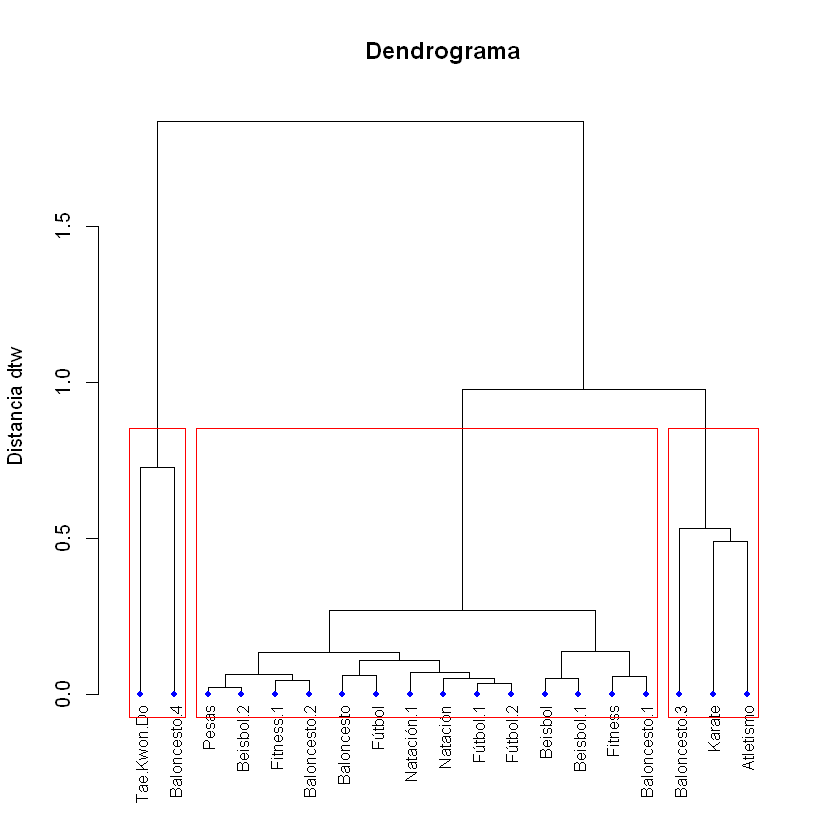

In [9]:
modelo_dtw <- hclust(dist(indices_transp, method="dtw"))
# mostrar los clusters que queremos obtener

fit <- modelo_dtw

nodePar <- list(lab.cex = 0.8, pch = c(NA, 19), cex = 0.7, col = "blue")
plot(as.dendrogram(fit), xlab = "", sub="", ylab = "Distancia dtw",
     main = "Dendrograma", nodePar = nodePar)

rect.hclust(fit, k=3, border="red")

In [10]:
# a que cluster pertenece cada uno de los indices
clusters_dtw <- cutree(modelo_dtw,k=3)
indices_con_clusters <- cbind(indices_transp, clusters_dtw)
head(indices_con_clusters)

,Velocidad,Fuerza,Potencia,Equilibrio,Coordinaci¢n,Tiempo de reacci¢n,Flexibilidad,Biomec nica corporal,clusters_dtw
Karate,0.1400000,0.0600000,0.3000000,0.07000000,0.13000000,0.18000000,0.04000000,0.09000000,1
Fitness,0.3762932,0.2319630,0.1765643,0.09521916,0.05405096,0.03327292,0.02118693,0.01144952,2
Natación,0.4279301,0.2479008,0.1354469,0.08269160,0.04973717,0.02781666,0.01815964,0.01031714,2
Baloncesto,0.4024525,0.2412173,0.1328492,0.08419051,0.05655265,0.03783455,0.02715826,0.01774496,2
Fútbol,0.4078274,0.2412759,0.1418117,0.08819383,0.05711617,0.03165427,0.02049700,0.01162377,2
Fitness.1,0.4031472,0.2583240,0.1486263,0.08521923,0.04886586,0.02843915,0.01728671,0.01009149,2


In [11]:
# guardar la información
write.csv(indices_con_clusters,"indices_con_clusters.csv")